# Exploratory Data Analysis

In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("../data/processed/cleaned_data.csv")

In [44]:
df.sort_values(by = "Fiyat").head()

,Net_Metrekare,Brüt_Metrekare,Oda_Sayısı,Bulunduğu_Kat,Eşya_Durumu,Binanın_Yaşı,Isıtma_Tipi,Fiyat,Şehir,Binanın_Kat_Sayısı,Kullanım_Durumu,Yatırıma_Uygunluk,Takas,Banyo_Sayısı
10951,97,114,4,2.Kat,Boş,1,Kombi Doğalgaz,20000,duzce,3,Boş,Bilinmiyor,Var,2
10952,55,77,3,2.Kat,Boş,1,Kombi Doğalgaz,20000,duzce,3,Boş,Bilinmiyor,Var,1
1861,80,90,2,3.Kat,Eşyalı,5-10,Jeotermal,25000,afyonkarahisar,7,Boş,Uygun,Yok,1
5827,5,6,7,5.Kat,Boş,0 (Yeni),Sobalı,29000,bursa,1,Boş,Bilinmiyor,Yok,6
5347,65,67,2,2.Kat,Eşyalı,5-10,Merkezi Doğalgaz,30000,bolu,6,Boş,Uygun,Yok,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20109 entries, 0 to 20108
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Net_Metrekare       20109 non-null  int64 
 1   Brüt_Metrekare      20109 non-null  int64 
 2   Oda_Sayısı          20109 non-null  int64 
 3   Bulunduğu_Kat       20109 non-null  object
 4   Eşya_Durumu         20109 non-null  object
 5   Binanın_Yaşı        20109 non-null  object
 6   Isıtma_Tipi         20109 non-null  object
 7   Fiyat               20109 non-null  int64 
 8   Şehir               20109 non-null  object
 9   Binanın_Kat_Sayısı  20109 non-null  int64 
 10  Kullanım_Durumu     20109 non-null  object
 11  Yatırıma_Uygunluk   20109 non-null  object
 12  Takas               20109 non-null  object
 13  Banyo_Sayısı        20109 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 2.1+ MB


In [46]:
categorical_columns = ["Bulunduğu_Kat","Eşya_Durumu","Binanın_Yaşı","Isıtma_Tipi","Şehir","Kullanım_Durumu","Yatırıma_Uygunluk","Takas"]
for col in categorical_columns: 
    print(f"{col} categories : {df[col].nunique()}\n")

Bulunduğu_Kat categories : 37

Eşya_Durumu categories : 2

Binanın_Yaşı categories : 9

Isıtma_Tipi categories : 13

Şehir categories : 53

Kullanım_Durumu categories : 3

Yatırıma_Uygunluk categories : 2

Takas categories : 2



     Some of the features are of object type, but we can use binary encoding for them because each feature contains only two categories.I'll use binary encoding on them so I can use them on my graphs and correlation matrix.

In [47]:
df["Eşya_Durumu"] = df["Eşya_Durumu"].map({'Eşyalı' : 1 , 'Boş' : 0})
df["Yatırıma_Uygunluk"] = df["Yatırıma_Uygunluk"].map({'Uygun' : 1  , 'Bilinmiyor' : 0})
df["Takas"] = df["Takas"].map({'Var': 1, 'Yok': 0 })

<Axes: >

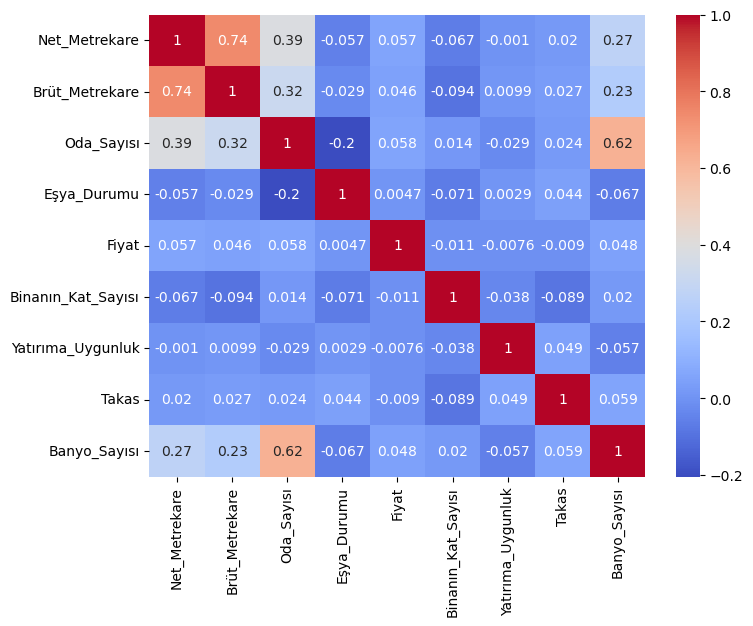

In [48]:
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

### Heatmap Analysis
 *Our target variable has almost no strong linear correlation with the other features or our dataset is not very clean.*
 
 *There is a strong negative correlation between oda_sayısı and eşya_durumu. This means that as the number of rooms decreases, the likelihood of the house being furnished increases.*
 
 *The relationship between net and gross area is expected.As gross area increases, net area usually increases.*

### Scatter plots

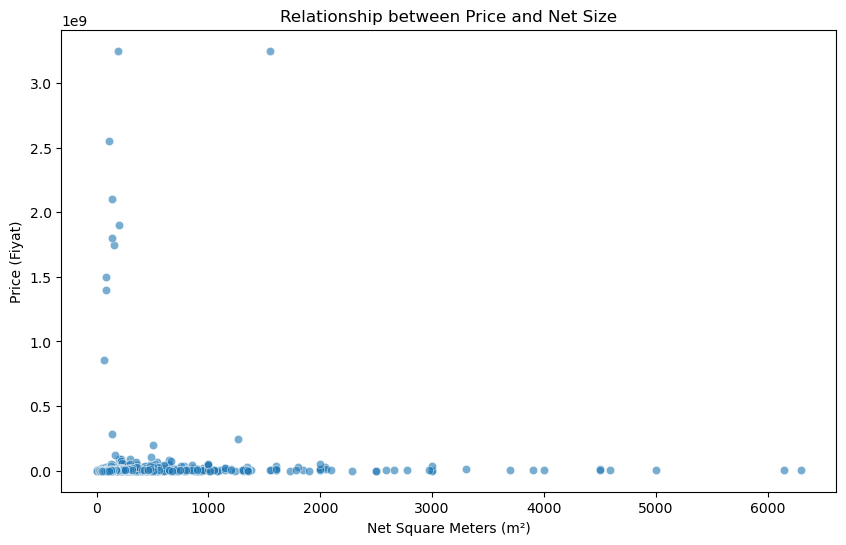

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Net_Metrekare', y='Fiyat', alpha=0.6)
plt.title('Relationship between Price and Net Size')
plt.xlabel('Net Square Meters (m²)')
plt.ylabel('Price (Fiyat)')
plt.show()

This plot shows us that there is outliers. We can't see the real relationship between them with these. So lets delete this outliers and plot a new graph.

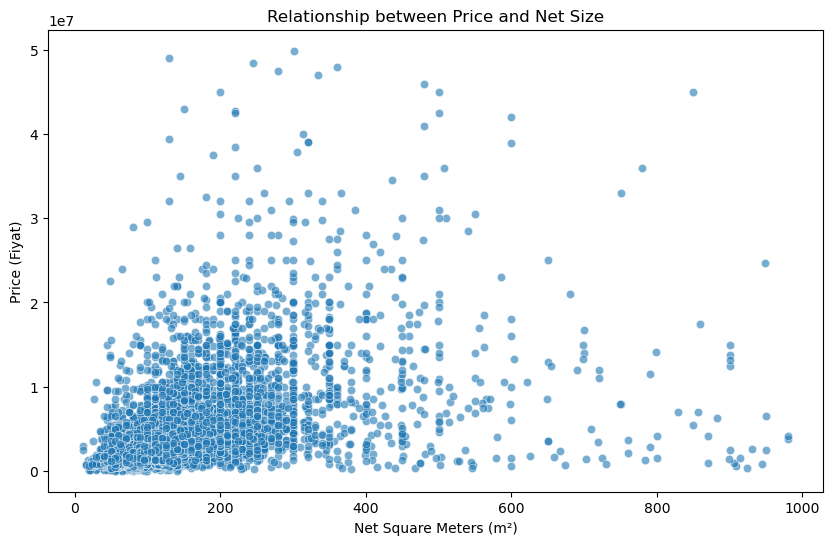

In [63]:
max_price = 50000000  
max_size = 1000

df_new = df[
    (df['Fiyat'] < max_price) & 
    (df['Net_Metrekare'] < max_size) &
    (df['Net_Metrekare'] > 10)
]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x='Net_Metrekare', y='Fiyat', alpha=0.6)
plt.title('Relationship between Price and Net Size')
plt.xlabel('Net Square Meters (m²)')
plt.ylabel('Price (Fiyat)')
plt.show()

Lets create a heatmap to see if there is change after deleting the outliers.

<Axes: >

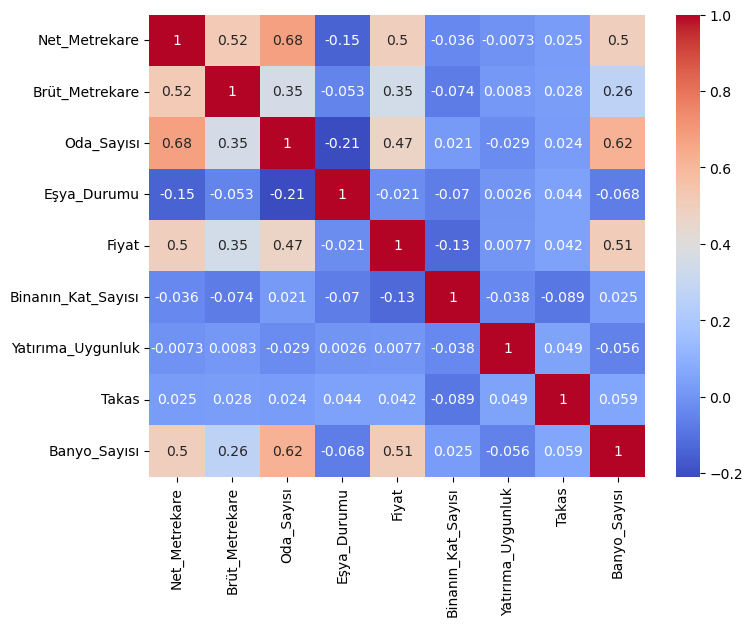

In [64]:
plt.figure(figsize=(8,6))
numeric_df = df_new.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")